_Alex Malz (NYU)_
_(Add your name here when contributing.)_

_Christian Setzer (Stockholm University)_


# PRObabilistic CLAssification Metrics

This notebook explores the behavior of a number of classification metrics, drawn from [discussions](https://docs.google.com/document/d/1pg0KUY0KihjlWKwoCE7Fc29u9pjv-fhwUnL8o34s58k/edit#) in the context of PLAsTiCC.

Many classification metrics are already implemented in [`scikit-learn`](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

In [1]:
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import label_binarize
# Initialize figure number label variable
fignum = 1

Define the true classes for each object and the corresponding classifier results that will be used in this notebook

In [2]:
# Basic Binary Random Classifier Mock Data 
N_binary_objects = 100

# Define binary labels for true class of data and
# Define target scores, probability of the positive (class == 1) class
# in the binary classification scenario

binary_true_class = np.zeros(N_binary_objects) 
binary_scores = np.zeros(N_binary_objects)
for i in range(N_binary_objects):
    binary_true_class[i] = random.randint(0,1)
    binary_scores[i] = random.random()
    

In [3]:
# Basic Multi-class Random Classifier Mock Data

# Set the number of objects in your set
N_multi_objects = N_binary_objects

#Choose number of classes
N_class = 5

# Define true class labels and scores in the multi-class case
multi_true_class = np.zeros(N_multi_objects) 
multi_scores = np.zeros((N_multi_objects,N_class))
                  
for j in range(N_multi_objects):
    multi_true_class[j] = random.randint(0,N_class-1)
    for k in range(N_class) :
        cum_prob_left = 1 - sum(multi_scores[j,:])
        multi_scores[j,k] = random.uniform(0,cum_prob_left)

# Receiver Operating Curve (ROC) and ROC Area Under Curve (AUC)

[on Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
### ROC
Pros
* Works with multi-label data

Cons
* Doesn't naturally work with multi-class data
* Need results from classifier in a probabilistic format

In [4]:
from sklearn.metrics import roc_curve

# Pass true classes and classifier scores, to roc function to return 
# false postive rate, true positive rate and associated threshold values
binary_false_pr, binary_true_pr, binary_thresholds = roc_curve(binary_true_class,binary_scores)

# Show the results of computation from ROC funciton 
# Useful for comparison to online examples
#print(binary_false_pr)
#print(binary_true_pr)
#print(binary_thresholds)

#Continue Below 

In [5]:
# Compute ROCs for multi-class case

# Initialize dictionaries for the Multi-class ROC curves
multi_false_pr = dict()
multi_true_pr = dict()
multi_thresholds = dict()

# Iterate over classes for 
for i in range(N_class):
    
    # Compute ROC curve values for current class
    multi_false_pr[i], multi_true_pr[i], multi_thresholds[i] = \
    roc_curve(multi_true_class,multi_scores[:,i],pos_label = i)
 

### AUC
Pros
* Commonly used

Cons
* Not good for sparse classes
* "Noisy" metric

In [6]:
from sklearn.metrics import roc_auc_score

# Use AUC function to compute the binary classifier AUC
binary_auc = roc_auc_score(binary_true_class,binary_scores)

# Output the AUC
#print(auc)

In [7]:
# Compute the AUC values for the multi-class ROC curves case

# Need to convert multi-class true class object into a binary label indicator format
blabel_multi_true_class = label_binarize(multi_true_class, classes=range(N_class))

# Compute the AUC for each class's ROC curve (hence average = None)
multi_auc = roc_auc_score(blabel_multi_true_class,multi_scores,average= None)

# Output compute AUCs for comparison to online examples if relevant
print(multi_auc)

[ 0.53014553  0.48759745  0.55846917  0.61        0.510625  ]


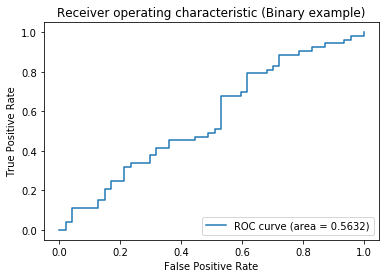

In [8]:
# Simple plot of the resulting ROC curve with associated AUC for the binary case
plt.figure(fignum)
fignum += 1
plt.plot(binary_false_pr,binary_true_pr,label='ROC curve (area = %0.4f)' %binary_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Binary example)')
plt.legend(loc="lower right")
plt.show()

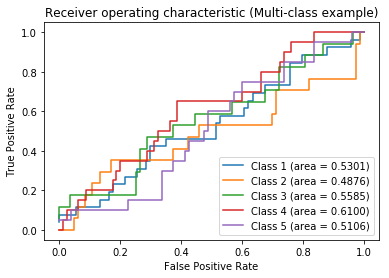

In [9]:
# Simple plot of the ROC curves for each class in the multi-class case with associated AUC
plt.figure(fignum)
fignum += 1
for i in range(N_class):
    plt.plot(multi_false_pr[i],multi_true_pr[i],label='Class %i' %(i+1) + ' (area = %0.4f)' %multi_auc[i])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Multi-class example)')
plt.legend(loc="lower right")
plt.show()

### Standard Score (zROC)

[on Wikipedia](https://en.wikipedia.org/wiki/Standard_score)

Pros

Cons
* Not implemented in `scikit-learn`

In [10]:
# write it!

### Detection Error Tradeoff (DET) Graph

[on Wikipedia](https://en.wikipedia.org/wiki/Detection_error_tradeoff)

Pros
* More sensitive to areas of interest than ROC

Cons
* Not implemented in `scikit-learn`

In [11]:
# write it!

## Log-Loss

[on Wikipedia](https://en.wikipedia.org/wiki/Loss_functions_for_classification)

The Log-loss metric outputs a value that is meant to be minimized. A perfect
classifier would have  `log-loss = 0`. A perfectly uniform classifier would have `log-loss = log(number_classes)`

Pros
* `scikit-learn` implementation works with multi-class data

Cons
* Doesn't naturally work with multi-class data (Christian: I disagree on this point) 

In [12]:
from sklearn.metrics import log_loss

# Compute the log loss value for the binary class case
# Normalize = True gives log-loss average per sample (this is the default)
binary_log_loss = log_loss(binary_true_class,binary_scores, normalize=True)

# Print out the resulting mean log loss value per sample for evaultion against
# the results of other classifiers
print('Binary Log-loss = %0.4f' %binary_log_loss)

Binary Log-loss = 0.8896


In [13]:
# Multi-class log-loss

# Output the log-loss total 

## Brier score

[on Wikipedia](https://en.wikipedia.org/wiki/Brier_score)

Pros
* Naturally works with multi-class data
* Intuitively interpretable

Cons
* `scikit-learn` implementation only works with binary classes

In [14]:
from sklearn.metrics import brier_score_loss

## Precision-Recall Curve (PRC)

[on Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

Pros

Cons

In [15]:
from sklearn.metrics import precision_recall_curve

### PRC Area Under Curve (AUC)

[not on Wikipedia](https://andybeger.com/2015/03/16/precision-recall-curves/)

Pros
* Better for sparse data than ROC AUC

Cons
* Doesn't naturally work with multi-class data

In [16]:
from sklearn.metrics import auc

### PRC Average Precision Score

Pros
* Less optimistic than PRC AUC

Cons

In [17]:
from sklearn.metrics import average_precision_score

## Other modifications of deterministic metrics?

## Impact of converting classifications from deterministic to probabilistic?